# Object Localization and Recognition

### Necessary libraries/modules

In [2]:
import os
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

from resnet import resnet50
from loading_data import load_train_dataset
from testing import test
from evaluation import read_test_data, evaluate1, evaluate2

from training_svm import train_SVM

from const import TEST_DIR

In [3]:
TRAIN_FLAG = True

In [4]:
# Class label (unique)
class_labels = np.asarray(['n01615121', 'n02099601', 'n02123159', 'n02129604', 'n02317335',
                           'n02391049', 'n02410509', 'n02422699', 'n02481823', 'n02504458'])
# Actual names
class_names = np.asarray(['eagle', 'dog', 'cat', 'tiger', 'star',
                          'zebra', 'bison', 'antelope', 'chimpanzee', 'elephant'])

In [5]:
# Creating ResNet50 model
model = resnet50(pretrained=True)

### Training

In [7]:
if TRAIN_FLAG is True:
    # Loading the train set (feature vectors and feature label)
    train_features = load_train_dataset(model, l2_normalization=False)

Pre-processing all the images in the train set...

Loaded image: 'n02422699_8751.JPEG'...
Pre-processed: 'n02422699_8751.JPEG'...
Extracting feature vectors: 'n02422699_8751.JPEG'...

Loaded image: 'n02422699_5102.JPEG'...
Pre-processed: 'n02422699_5102.JPEG'...
Extracting feature vectors: 'n02422699_5102.JPEG'...

Loaded image: 'n02422699_6082.JPEG'...
Pre-processed: 'n02422699_6082.JPEG'...
Extracting feature vectors: 'n02422699_6082.JPEG'...

Loaded image: 'n02422699_9634.JPEG'...
Pre-processed: 'n02422699_9634.JPEG'...
Extracting feature vectors: 'n02422699_9634.JPEG'...

Loaded image: 'n02422699_2541.JPEG'...
Pre-processed: 'n02422699_2541.JPEG'...
Extracting feature vectors: 'n02422699_2541.JPEG'...

Loaded image: 'n02422699_11019.JPEG'...
Pre-processed: 'n02422699_11019.JPEG'...
Extracting feature vectors: 'n02422699_11019.JPEG'...

Loaded image: 'n02422699_4564.JPEG'...
Pre-processed: 'n02422699_4564.JPEG'...
Extracting feature vectors: 'n02422699_4564.JPEG'...

Loaded image: '

Extracting feature vectors: 'n02317335_10608.JPEG'...

Loaded image: 'n02317335_12376.JPEG'...
Pre-processed: 'n02317335_12376.JPEG'...
Extracting feature vectors: 'n02317335_12376.JPEG'...

Loaded image: 'n02317335_5888.JPEG'...
Pre-processed: 'n02317335_5888.JPEG'...
Extracting feature vectors: 'n02317335_5888.JPEG'...

Loaded image: 'n02317335_4325.JPEG'...
Pre-processed: 'n02317335_4325.JPEG'...
Extracting feature vectors: 'n02317335_4325.JPEG'...

Loaded image: 'n02317335_9278.JPEG'...
Pre-processed: 'n02317335_9278.JPEG'...
Extracting feature vectors: 'n02317335_9278.JPEG'...

Loaded image: 'n02317335_16905.JPEG'...
Pre-processed: 'n02317335_16905.JPEG'...
Extracting feature vectors: 'n02317335_16905.JPEG'...

Loaded image: 'n02317335_3815.JPEG'...
Pre-processed: 'n02317335_3815.JPEG'...
Extracting feature vectors: 'n02317335_3815.JPEG'...

Loaded image: 'n02317335_25487.JPEG'...
Pre-processed: 'n02317335_25487.JPEG'...
Extracting feature vectors: 'n02317335_25487.JPEG'...

Loade

Extracting feature vectors: 'n02129604_15877.JPEG'...

Loaded image: 'n02123159_6149.JPEG'...
Pre-processed: 'n02123159_6149.JPEG'...
Extracting feature vectors: 'n02123159_6149.JPEG'...

Loaded image: 'n02129604_10815.JPEG'...
Pre-processed: 'n02129604_10815.JPEG'...
Extracting feature vectors: 'n02129604_10815.JPEG'...

Loaded image: 'n02129604_10156.JPEG'...
Pre-processed: 'n02129604_10156.JPEG'...
Extracting feature vectors: 'n02129604_10156.JPEG'...

Loaded image: 'n02123159_7485.JPEG'...
Pre-processed: 'n02123159_7485.JPEG'...
Extracting feature vectors: 'n02123159_7485.JPEG'...

Loaded image: 'n02129604_13097.JPEG'...
Pre-processed: 'n02129604_13097.JPEG'...
Extracting feature vectors: 'n02129604_13097.JPEG'...

Loaded image: 'n02129604_7029.JPEG'...
Pre-processed: 'n02129604_7029.JPEG'...
Extracting feature vectors: 'n02129604_7029.JPEG'...

Loaded image: 'n02129604_7320.JPEG'...
Pre-processed: 'n02129604_7320.JPEG'...
Extracting feature vectors: 'n02129604_7320.JPEG'...

Loade

Extracting feature vectors: 'n02481823_21859.JPEG'...

Loaded image: 'n02481823_20874.JPEG'...
Pre-processed: 'n02481823_20874.JPEG'...
Extracting feature vectors: 'n02481823_20874.JPEG'...

Loaded image: 'n02481823_18735.JPEG'...
Pre-processed: 'n02481823_18735.JPEG'...
Extracting feature vectors: 'n02481823_18735.JPEG'...

Loaded image: 'n02481823_3117.JPEG'...
Pre-processed: 'n02481823_3117.JPEG'...
Extracting feature vectors: 'n02481823_3117.JPEG'...

Loaded image: 'n02481823_7692.JPEG'...
Pre-processed: 'n02481823_7692.JPEG'...
Extracting feature vectors: 'n02481823_7692.JPEG'...

Loaded image: 'n02481823_13345.JPEG'...
Pre-processed: 'n02481823_13345.JPEG'...
Extracting feature vectors: 'n02481823_13345.JPEG'...

Loaded image: 'n02481823_6522.JPEG'...
Pre-processed: 'n02481823_6522.JPEG'...
Extracting feature vectors: 'n02481823_6522.JPEG'...

Loaded image: 'n02481823_9507.JPEG'...
Pre-processed: 'n02481823_9507.JPEG'...
Extracting feature vectors: 'n02481823_9507.JPEG'...

Loade

Extracting feature vectors: 'n02410509_9176.JPEG'...

Loaded image: 'n02410509_8015.JPEG'...
Pre-processed: 'n02410509_8015.JPEG'...
Extracting feature vectors: 'n02410509_8015.JPEG'...

Loaded image: 'n02410509_587.JPEG'...
Pre-processed: 'n02410509_587.JPEG'...
Extracting feature vectors: 'n02410509_587.JPEG'...

Loaded image: 'n02410509_856.JPEG'...
Pre-processed: 'n02410509_856.JPEG'...
Extracting feature vectors: 'n02410509_856.JPEG'...

Loaded image: 'n02410509_2678.JPEG'...
Pre-processed: 'n02410509_2678.JPEG'...
Extracting feature vectors: 'n02410509_2678.JPEG'...

Loaded image: 'n02410509_733.JPEG'...
Pre-processed: 'n02410509_733.JPEG'...
Extracting feature vectors: 'n02410509_733.JPEG'...

Loaded image: 'n02410509_7953.JPEG'...
Pre-processed: 'n02410509_7953.JPEG'...
Extracting feature vectors: 'n02410509_7953.JPEG'...

Loaded image: 'n02410509_8018.JPEG'...
Pre-processed: 'n02410509_8018.JPEG'...
Extracting feature vectors: 'n02410509_8018.JPEG'...

Loaded image: 'n02410509

Extracting feature vectors: 'n02391049_1211.JPEG'...

Loaded image: 'n02391049_483.JPEG'...
Pre-processed: 'n02391049_483.JPEG'...
Extracting feature vectors: 'n02391049_483.JPEG'...

Loaded image: 'n02391049_6517.JPEG'...
Pre-processed: 'n02391049_6517.JPEG'...
Extracting feature vectors: 'n02391049_6517.JPEG'...

Loaded image: 'n02391049_3220.JPEG'...
Pre-processed: 'n02391049_3220.JPEG'...
Extracting feature vectors: 'n02391049_3220.JPEG'...

Loaded image: 'n02391049_9528.JPEG'...
Pre-processed: 'n02391049_9528.JPEG'...
Extracting feature vectors: 'n02391049_9528.JPEG'...

Loaded image: 'n02391049_2627.JPEG'...
Pre-processed: 'n02391049_2627.JPEG'...
Extracting feature vectors: 'n02391049_2627.JPEG'...

Loaded image: 'n02391049_3333.JPEG'...
Pre-processed: 'n02391049_3333.JPEG'...
Extracting feature vectors: 'n02391049_3333.JPEG'...

Loaded image: 'n02391049_2871.JPEG'...
Pre-processed: 'n02391049_2871.JPEG'...
Extracting feature vectors: 'n02391049_2871.JPEG'...

Loaded image: 'n02

Extracting feature vectors: 'n02504458_6874.JPEG'...

Loaded image: 'n02504458_2417.JPEG'...
Pre-processed: 'n02504458_2417.JPEG'...
Extracting feature vectors: 'n02504458_2417.JPEG'...

Loaded image: 'n02504458_8889.JPEG'...
Pre-processed: 'n02504458_8889.JPEG'...
Extracting feature vectors: 'n02504458_8889.JPEG'...

Loaded image: 'n02504458_1169.JPEG'...
Pre-processed: 'n02504458_1169.JPEG'...
Extracting feature vectors: 'n02504458_1169.JPEG'...

Loaded image: 'n02504458_6301.JPEG'...
Pre-processed: 'n02504458_6301.JPEG'...
Extracting feature vectors: 'n02504458_6301.JPEG'...

Loaded image: 'n02504458_4296.JPEG'...
Pre-processed: 'n02504458_4296.JPEG'...
Extracting feature vectors: 'n02504458_4296.JPEG'...

Loaded image: 'n02504458_6791.JPEG'...
Pre-processed: 'n02504458_6791.JPEG'...
Extracting feature vectors: 'n02504458_6791.JPEG'...

Loaded image: 'n02504458_7745.JPEG'...
Pre-processed: 'n02504458_7745.JPEG'...
Extracting feature vectors: 'n02504458_7745.JPEG'...

Loaded image: '

In [11]:
if TRAIN_FLAG is True:
    # Feature vectors and label for Train set
    train_feature_vectors = [feature['feature_vec'] for feature in train_features]
    train_feature_labels = [feature['label'] for feature in train_features]

In [12]:
if TRAIN_FLAG is True:
    # One vs all training
    svm_models = train_SVM(train_feature_vectors, train_feature_labels, class_labels)
    
    # Saving the models
    for i, svm_model in enumerate(svm_models):
        pickle.dump(svm_model, open('../model/svm_model_{}.obj'.format(i), 'wb'))

### Testing

In [13]:
# Loading the models before testing
svm_models = []
for i in range(10):
    svm_model = pickle.load(open('../model/svm_model_{}.obj'.format(i), 'rb'))
    svm_models.append(svm_model)

In [14]:
# Edge detection object ('Edge box' method)
edge_detection = cv2.ximgproc.createStructuredEdgeDetection('../model/model.yml')

In [17]:
print(TRAIN_FLAG)

True


In [18]:
# Testing results
test_predictions, box_boundaries = test(edge_detection, model, svm_models, l2_normalization=False)


Testing: '0.JPEG'...
Extracting candidate windows: '0.JPEG'...
Classifying and Localizing: '0.JPEG'...
Predictions: '0.JPEG'...

Testing: '1.JPEG'...
Extracting candidate windows: '1.JPEG'...
Classifying and Localizing: '1.JPEG'...
Predictions: '1.JPEG'...

Testing: '2.JPEG'...
Extracting candidate windows: '2.JPEG'...
Classifying and Localizing: '2.JPEG'...
Predictions: '2.JPEG'...

Testing: '3.JPEG'...
Extracting candidate windows: '3.JPEG'...
Classifying and Localizing: '3.JPEG'...
Predictions: '3.JPEG'...

Testing: '4.JPEG'...
Extracting candidate windows: '4.JPEG'...
Classifying and Localizing: '4.JPEG'...
Predictions: '4.JPEG'...

Testing: '5.JPEG'...
Extracting candidate windows: '5.JPEG'...
Classifying and Localizing: '5.JPEG'...
Predictions: '5.JPEG'...

Testing: '6.JPEG'...
Extracting candidate windows: '6.JPEG'...
Classifying and Localizing: '6.JPEG'...
Predictions: '6.JPEG'...

Testing: '7.JPEG'...
Extracting candidate windows: '7.JPEG'...
Classifying and Localizing: '7.JP

Extracting candidate windows: '62.JPEG'...
Classifying and Localizing: '62.JPEG'...
Predictions: '62.JPEG'...

Testing: '63.JPEG'...
Extracting candidate windows: '63.JPEG'...
Classifying and Localizing: '63.JPEG'...
Predictions: '63.JPEG'...

Testing: '64.JPEG'...
Extracting candidate windows: '64.JPEG'...
Classifying and Localizing: '64.JPEG'...
Predictions: '64.JPEG'...

Testing: '65.JPEG'...
Extracting candidate windows: '65.JPEG'...
Classifying and Localizing: '65.JPEG'...
Predictions: '65.JPEG'...

Testing: '66.JPEG'...
Extracting candidate windows: '66.JPEG'...
Classifying and Localizing: '66.JPEG'...
Predictions: '66.JPEG'...

Testing: '67.JPEG'...
Extracting candidate windows: '67.JPEG'...
Classifying and Localizing: '67.JPEG'...
Predictions: '67.JPEG'...

Testing: '68.JPEG'...
Extracting candidate windows: '68.JPEG'...
Classifying and Localizing: '68.JPEG'...
Predictions: '68.JPEG'...

Testing: '69.JPEG'...
Extracting candidate windows: '69.JPEG'...
Classifying and Localizing

### Evaluation

In [25]:
# Evaluation 1
evaluation1_results = evaluate1(test_predictions, class_labels)

In [26]:
# Evaluation 2
evaluation2_results = evaluate2(test_predictions, box_boundaries, class_labels)

In [27]:
evaluation1_results

[{'label': 0,
  'metrics': {'accuracy': 99.0,
   'TP': 10,
   'FP': 1,
   'FN': 0,
   'TN': 89,
   'recall': 0.9999999989999999,
   'precision:': 0.9090909082644627,
   'NPV': 0.9999999998876405,
   'FPR': 0.011111111109876544,
   'FDR': 0.09090909082644627,
   'F1': 0.9523809464852607,
   'F2': 0.980392153787005}},
 {'label': 1,
  'metrics': {'accuracy': 100.0,
   'TP': 10,
   'FP': 0,
   'FN': 0,
   'TN': 90,
   'recall': 0.9999999989999999,
   'precision:': 0.9999999989999999,
   'NPV': 0.999999999888889,
   'FPR': 0.0,
   'FDR': 0.0,
   'F1': 0.999999994,
   'F2': 0.999999997}},
 {'label': 2,
  'metrics': {'accuracy': 100.0,
   'TP': 10,
   'FP': 0,
   'FN': 0,
   'TN': 90,
   'recall': 0.9999999989999999,
   'precision:': 0.9999999989999999,
   'NPV': 0.999999999888889,
   'FPR': 0.0,
   'FDR': 0.0,
   'F1': 0.999999994,
   'F2': 0.999999997}},
 {'label': 3,
  'metrics': {'accuracy': 100.0,
   'TP': 10,
   'FP': 0,
   'FN': 0,
   'TN': 90,
   'recall': 0.9999999989999999,
   'prec

In [29]:
evaluation2_results

{'overall_accuracy': 0.64,
 'localization_accuracies': array([76.60894288, 44.67798974, 63.11823933, 97.28449637, 85.51708485,
        75.40983607, 68.52947504, 51.66199439, 54.27877155, 71.84606741,
        75.29757021, 88.12712184, 70.55861609, 78.66823807, 87.03896365,
        98.17164911,  1.08624189, 35.56803263, 85.44420256, 64.78325242,
        52.39814337, 45.41300204, 56.84445969, 88.47006652, 77.24922515,
        76.55937672, 69.67905405, 63.84836883, 76.7612276 , 50.27739251,
        76.05801709, 47.94064107, 14.44035948, 43.50038158, 70.00261757,
        79.82003417, 43.2775264 , 79.40455498, 71.01585941, 73.22149344,
        38.61501704, 84.68370491, 78.29989055, 13.127372  , 77.39364616,
        45.73605608, 80.01461073, 51.47526101, 32.34075735, 58.15205686,
        96.37347225, 69.26765475,  4.79529797, 34.40765046, 54.48139271,
        45.6368177 , 38.04042673, 96.46414633, 32.57956041, 65.61792097,
        96.94900719, 37.18570552, 64.9648483 , 92.1775234 , 57.089853 

### Displaying on sample images

In [30]:
idx = 0

In [150]:
'''
    Drawing the overlayed image with box boundaries
    
    :param idx - index of the image in test image dataset
    :param draw_all_boxes - flag for determining the boxes for overlayed image:
                                - True: all 50 (max) boxes are drawn
                                - False: only the 'best' predicted box is drawn
    :param draw_labels - flag for determining putting the labels near the boxes
'''
def overlayed_image(idx, draw_all_boxes=False, draw_labels=False):
    # Reading image in index 'idx'
    image = cv2.imread(os.path.join(TEST_DIR, 'images', '{}.JPEG'.format(idx)))
    
    # Prediction data: label, boxes
    predicted_label, box_index = test_predictions[idx]
    
    # Ground truth data
    ground_truth_data = read_test_data(class_labels)
    ground_truth_labels = ground_truth_data['labels']
    ground_truth_boxes = ground_truth_data['boxes']
    
    # Drawing ground true box
    true_label = ground_truth_labels[idx]
    box_x1, box_y1, box_x2, box_y2 = ground_truth_boxes[idx]
    cv2.rectangle(image, (box_x1, box_y1), (box_x2, box_y2), (0, 255, 0), 2)
    
    print("Predicted label:", class_names[predicted_label])
    print("Ground truth label:", class_names[true_label])
    print("Localization accuracy:", evaluation2_results['localization_accuracies'][idx])
    print("")
    
    # Ground Truth label text
    if draw_labels is True:            
        cv2.putText(image, class_names[true_label], (box_x1 + 30, box_y1 + 50), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (0, 255, 0)) 
    
    # Drawing
    if draw_all_boxes is True:
        for i in range(len(box_boundaries[idx])):
            box_x1, box_y1, width, height = box_boundaries[idx][i]
            box_x2, box_y2 = box_x1 + width, box_y1 + height
            
            # generate different colors
            new_color = (i*11%255, i*17%255, i*29%255)
            
            cv2.rectangle(image, (box_x1, box_y1), (box_x2, box_y2), new_color, 2)
    else:
        # Draw only the 'best' predicted box
        box_x1, box_y1, width, height = box_boundaries[idx][box_index]
        box_x2, box_y2 = box_x1 + width, box_y1 + height
        cv2.rectangle(image, (box_x1, box_y1), (box_x2, box_y2), (255, 0, 0), 2)
    
    # Prediction label text
    if draw_labels is True:
        cv2.putText(image, class_names[predicted_label], (box_x1, box_y1 + 30), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (255, 0, 0)) 
        
    return image

Predicted label: star
Ground truth label: star
Localization accuracy: 51.661994393271925

Predicted label: elephant
Ground truth label: elephant
Localization accuracy: 98.17164911362596

Predicted label: zebra
Ground truth label: zebra
Localization accuracy: 69.67905405405406

Predicted label: dog
Ground truth label: dog
Localization accuracy: 79.40455497615547

Predicted label: bison
Ground truth label: bison
Localization accuracy: 38.61501704240325

Predicted label: chimpanzee
Ground truth label: chimpanzee
Localization accuracy: 54.481392712085764

Predicted label: antelope
Ground truth label: antelope
Localization accuracy: 38.3361638651935

Predicted label: cat
Ground truth label: cat
Localization accuracy: 96.5158264947245

Predicted label: eagle
Ground truth label: eagle
Localization accuracy: 67.59780422711577

Predicted label: tiger
Ground truth label: tiger
Localization accuracy: 30.2415821754913



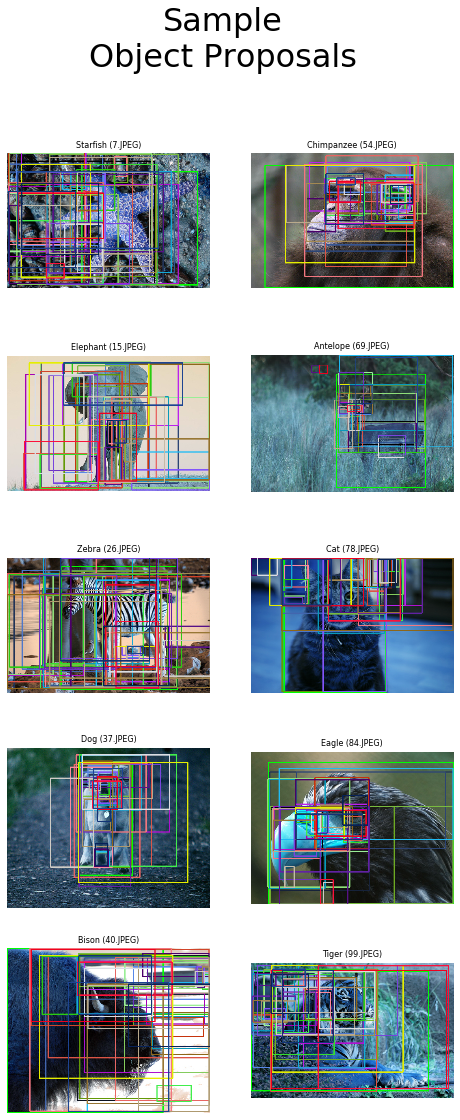

In [144]:
# define a 5x2 grid
figure, axis = plt.subplots(5, 2, figsize=(8, 18))

# define some samples
samples = [[7, "Starfish"], [15, "Elephant"], [26, "Zebra"], [37, "Dog"],
          [40, "Bison"], [54, "Chimpanzee"], [69, "Antelope"], [74, "Cat"],
          [84, "Eagle"], [99, "Tiger"]]

for i in range(10):
    
    # grid indices of the current image
    if i < 5:
        grid_x, grid_y = i, 0
    else:
        grid_x, grid_y = i % 5, 1
    
    # plot the current image (enlargened)
    img = overlayed_image(samples[i][0], draw_all_boxes=True)
    height, width, channels = img.shape
    axis[grid_x, grid_y].imshow(cv2.resize(img, (width * 3, height * 3)), cmap=plt.cm.gray)
    title = samples[i][1] + " (" + str(samples[i][0]) + ".JPEG)"
    axis[grid_x, grid_y].set_title(title, fontsize=8)
    axis[grid_x, grid_y].axis("off")

plt.suptitle("Sample\nObject Proposals", fontsize=32)
plt.savefig("grid.png")

Predicted label: star
Ground truth label: star
Localization accuracy: 68.52947504302927

Predicted label: star
Ground truth label: star
Localization accuracy: 51.661994393271925

Predicted label: elephant
Ground truth label: elephant
Localization accuracy: 70.55861609179269

Predicted label: elephant
Ground truth label: elephant
Localization accuracy: 78.66823806717737

Predicted label: zebra
Ground truth label: zebra
Localization accuracy: 77.249225154245

Predicted label: zebra
Ground truth label: zebra
Localization accuracy: 76.55937672149209

Predicted label: dog
Ground truth label: dog
Localization accuracy: 79.82003416846305

Predicted label: dog
Ground truth label: dog
Localization accuracy: 43.27752640496485

Predicted label: bison
Ground truth label: bison
Localization accuracy: 78.29989055089383

Predicted label: chimpanzee
Ground truth label: bison
Localization accuracy: 13.1273719954724

Predicted label: star
Ground truth label: chimpanzee
Localization accuracy: 4.795297968

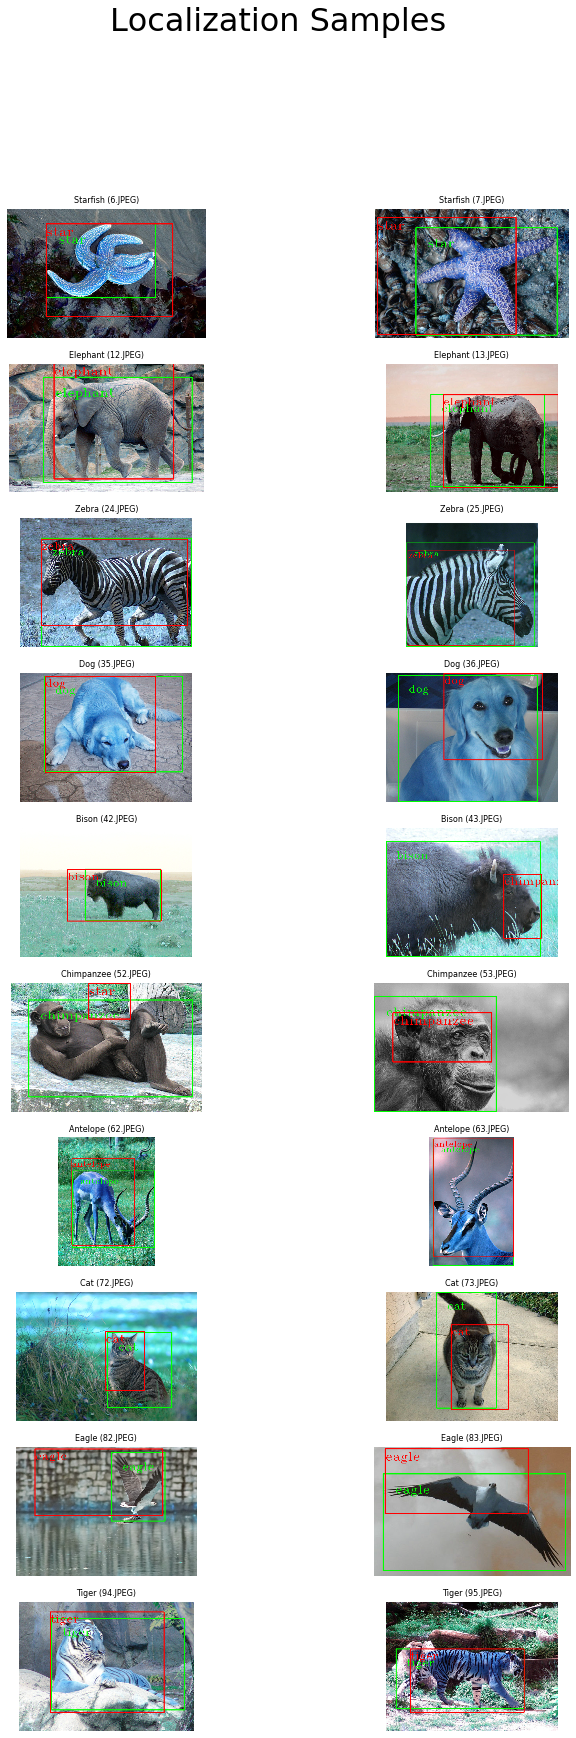

In [158]:
# define a 10x2 grid
figure, axis = plt.subplots(10, 2, figsize=(12, 28))

# define some samples
samples = [[6, "Starfish"], [12, "Elephant"], [24, "Zebra"], [35, "Dog"],
          [42, "Bison"], [52, "Chimpanzee"], [62, "Antelope"], [72, "Cat"],
          [82, "Eagle"], [94, "Tiger"]]

for i in range(10):
    
    for j in range(2):
        
        # plot two sample images
        img = overlayed_image(samples[i][0] + j, draw_labels=True)
        height, width, channels = img.shape
        axis[i, j].imshow(cv2.resize(img, (width * 4, height * 4)), cmap=plt.cm.gray)
        title = samples[i][1] + " (" + str(samples[i][0] + j) + ".JPEG)"
        axis[i, j].set_title(title, fontsize=8)
        axis[i, j].axis("off")

plt.suptitle("Localization Samples", fontsize=32)
plt.savefig("localization.png")